## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [3]:
%pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np

Note: you may need to restart the kernel to use updated packages.


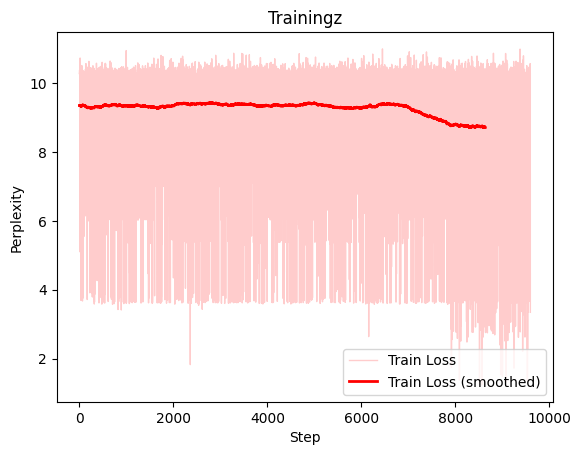

In [2]:
import pandas as pd
import numpy as np

tdat = pd.read_csv('lightning_logs/version_22/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]
if True:
    import matplotlib.pyplot as plt

    xspace = np.linspace(0, len(train), len(train))
    fsz = max(20, len(train)//10)
    filter = np.ones(fsz)/fsz

    plt.plot( train, label = 'Train Loss', color='#fcc', linewidth=1)
    plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
    if False and 'val_loss' in tdat:
        val = tdat.val_loss[~np.isnan(tdat.val_loss)]
        plt.plot( val, label = 'Val\'n Loss', color='#ccf', linewidth=1)
        plt.plot( np.convolve(val, filter, mode='valid'), label = 'Val\'n Loss (smoothed)', color='b', linewidth=2)

    plt.xlabel('Step')
    plt.ylabel('Perplexity')
    plt.legend(loc='lower right')
    plt.title('Trainingz')
    plt.show()


In [8]:
tdat

,train_loss,length,2ndchar,epoch,step
0,10.304382,2.0,102.0,0,49
1,9.496938,42.0,1188.0,0,99
2,10.275654,2.0,102.0,0,149
3,10.275006,2.0,102.0,0,199
4,9.085928,126.0,1109.0,0,249
5,10.284981,2.0,102.0,0,299
6,10.280841,2.0,102.0,0,349
7,8.756701,86.0,1130.0,0,399
8,8.804425,48.0,2431.0,0,449
9,0.000000,2.0,102.0,0,499
